# Ensemble Method & Random Forest
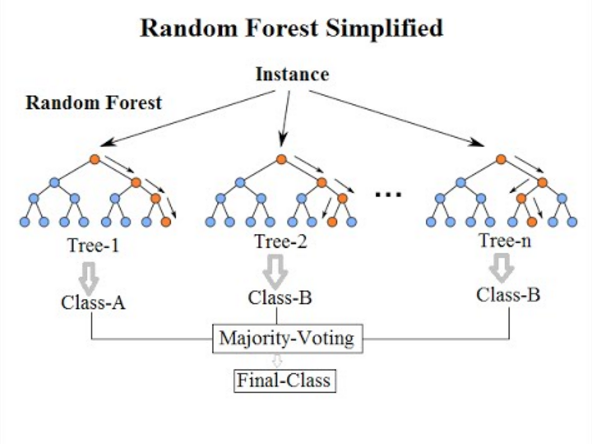

# Overview
Ensemble methods refer to combining multiple models to improve the overall performance of the system. One popular ensemble method is the Random Forest algorithm.

The Random Forest algorithm is a supervised machine learning algorithm that combines the predictions of multiple decision trees. The algorithm first creates multiple decision trees using random subsets of the data and random subsets of the features. Each decision tree is trained on a different subset of the data and features, resulting in a set of independent decision trees.

# Advantage
1. Can handle large datasets with high dimensionality.
2. Less prone to overfitting compared to individual decision trees.
3. Can be used for both classification and regression tasks.

# Disadvantage
1. Can be computationally expensive.
2. Can struggle with imbalanced datasets if not properly handled.

# Data
The Palmer penguins dataset is a collection of data on three different species of penguins, namely Adelie, Chinstrap, and Gentoo, collected on three islands in the Palmer Archipelago, Antarctica. The dataset contains various physical measurements of penguins, including culmen length, culmen depth, flipper length, and body mass, as well as information on the sex and age of each penguin.

The dataset is used for machine learning tasks like classification, where the goal is to predict the penguin class based on its characteristics.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In this analysis, we will explore the relationship between two key features of 2 categories of penguins, Adelie and Chinstrap, as well as their bill length and flipper length, and how these features can be used to differentiate between penguins. By visualizing the relationship between these features, we can gain a deeper understanding of how they may be useful in classifying category of penguin.

[Text(0.5, 0, 'Bill length'), Text(0, 0.5, 'Flipper length')]

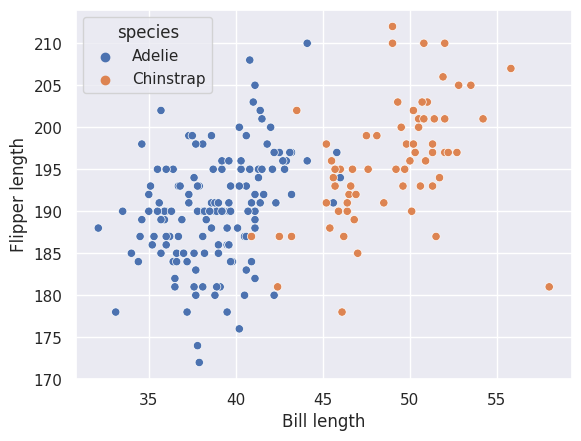

In [3]:
sns.set_theme() 
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

# Choose 2 species Adelie and Gentoo
df = df[df["species"].isin(["Adelie", "Chinstrap"])]
# Visualize chosen data
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue="species").set( 
                                        xlabel='Bill length', 
                                        ylabel='Flipper length')

We split the data into training and testing set, and also relabel the penguin class as numeric for the model.

In [4]:
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1

X = df[["bill_length_mm", "flipper_length_mm"]].to_numpy()
y = df["species"].map(make_labels).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


In ensemble learning, a voting classifier is a type of ensemble model that combines the predictions from multiple individual models to make a final prediction. It is a type of "majority voting" where the class predicted by each model is considered as a "vote" and the final prediction is based on the class with the most votes. Here we test some popular model liek logistic regression, random forest, singular value decomposition (SVC) along with our Voting Classifier. We then compare their accuracies.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'Voting')])

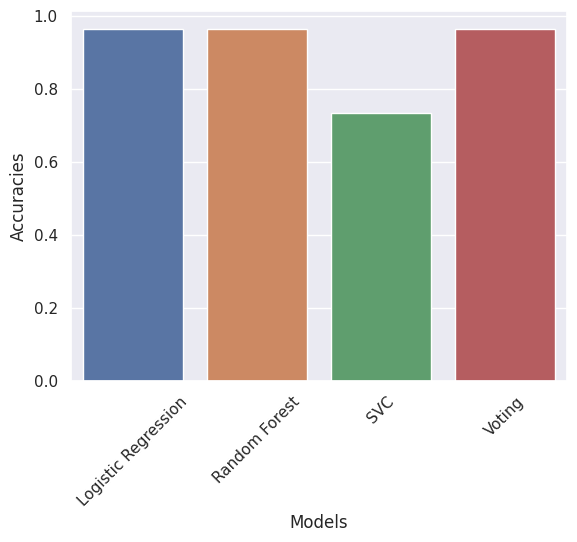

In [6]:
# Test some model accuracy
log = LogisticRegression()
rnd = RandomForestClassifier()
svm = SVC()

voting = VotingClassifier( estimators=[("lr", log), ("rf", rnd), ("svm", svm)], 
                               voting = "hard")

model_1 = {"Logistic Regression": log, 
         "Random Forest": rnd, 
         "SVC": svm, 
         "Voting": voting}

# Train and predict model accuracy
model_accuracies_1 = []
for key in model_1:
    model_1[key].fit(X_train, y_train)
    model_pred = model_1[key].predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    model_accuracies_1.append(accuracy)


# Visualize accuracy of each model
model_df = pd.DataFrame({'Models': list(model_1.keys()),
                         'Accuracies': model_accuracies_1})
sns.barplot(x = 'Models', y = 'Accuracies', data = model_df)
plt.xticks(rotation=45) 

As we see, the voting has the joint highest accuracy with random forest, we can now test with some other data that is more complicated to see if the voting classifer having the highest accuracy still holds true. Instead of bill length and flipper length (mm vs mm unit), we chose bill depth and body mass, which are scaled differntly (mm vs g unit). The data is also not linearly separable.

[Text(0.5, 0, 'Bill depth'), Text(0, 0.5, 'Body mass')]

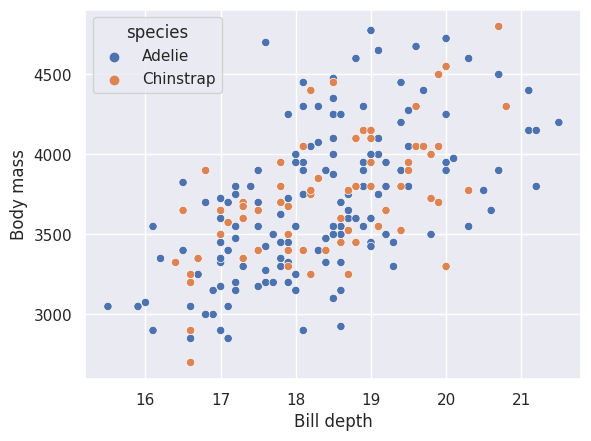

In [7]:
sns.scatterplot(data=df, x="bill_depth_mm", y="body_mass_g", hue="species").set( 
                                        xlabel='Bill depth', 
                                        ylabel='Body mass')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'Voting')])

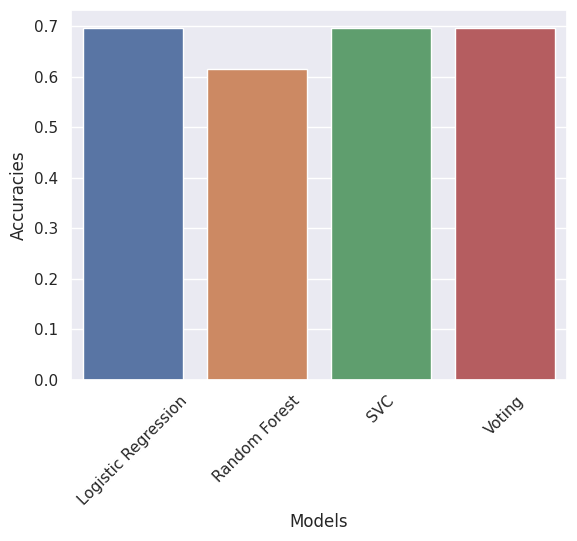

In [8]:
X = df[["bill_depth_mm", "body_mass_g"]].to_numpy()
y = df["species"].map(make_labels).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
model_accuracies_1 = []
for key in model_1:
    model_1[key].fit(X_train, y_train)
    model_pred = model_1[key].predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    model_accuracies_1.append(accuracy)
model_df = pd.DataFrame({'Models': list(model_1.keys()),
                         'Accuracies': model_accuracies_1})
sns.barplot(x = 'Models', y = 'Accuracies', data = model_df)
plt.xticks(rotation=45)

# Bagging
Voting still has the highest accuracy while random forest perform poorly on harder data. Next we can test the same dataset above with bagging. Bagging, which stands for bootstrap aggregation, is a machine learning technique that is used to reduce variance and improve model performance by combining the predictions of multiple models. In bagging, multiple models are trained on different subsets of the training data, and the final prediction is made by aggregating the predictions of these models. Here we test with decision tree with depth 1, 3, 5 and then a bagging model.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Decision Tree depth 1'),
  Text(1, 0, 'Decision Tree depth 3'),
  Text(2, 0, 'Decision Tree depth 5'),
  Text(3, 0, 'Bagging depth 1')])

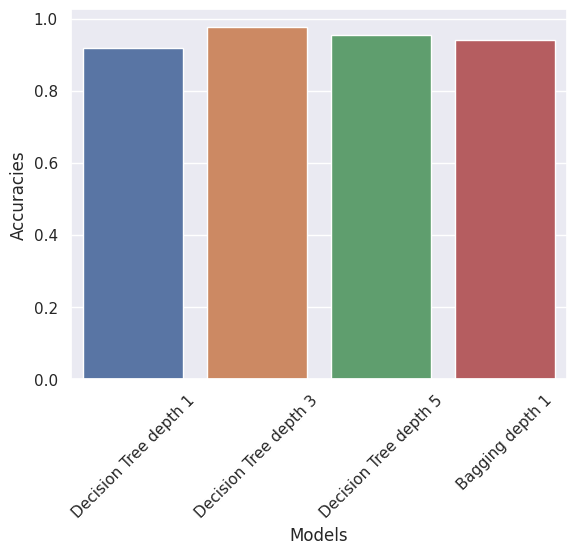

In [9]:
X = df[["bill_length_mm", "flipper_length_mm"]].to_numpy()
y = df["species"].map(make_labels).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
decision_tree_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
bagging_1 = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 500, bootstrap = True)

model_2 = {"Decision Tree depth 1": decision_tree_depth_1, 
         "Decision Tree depth 3": decision_tree_depth_3, 
         "Decision Tree depth 5": decision_tree_depth_5, 
         "Bagging depth 1": bagging_1}

model_accuracies_2 = []
for key in model_2:
    model_2[key].fit(X_train, y_train)
    model_pred = model_2[key].predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    model_accuracies_2.append(accuracy)
model_df = pd.DataFrame({'Models': list(model_2.keys()),
                         'Accuracies': model_accuracies_2})
sns.barplot(x = 'Models', y = 'Accuracies', data = model_df)
plt.xticks(rotation=45)

Overall, bagging has slightby better accuracy than not bagging, when decision tree dept is 1. We can visualize the decision region of decision tree depth 1 and its bagging to compare the model. First is decision tree depth 1.

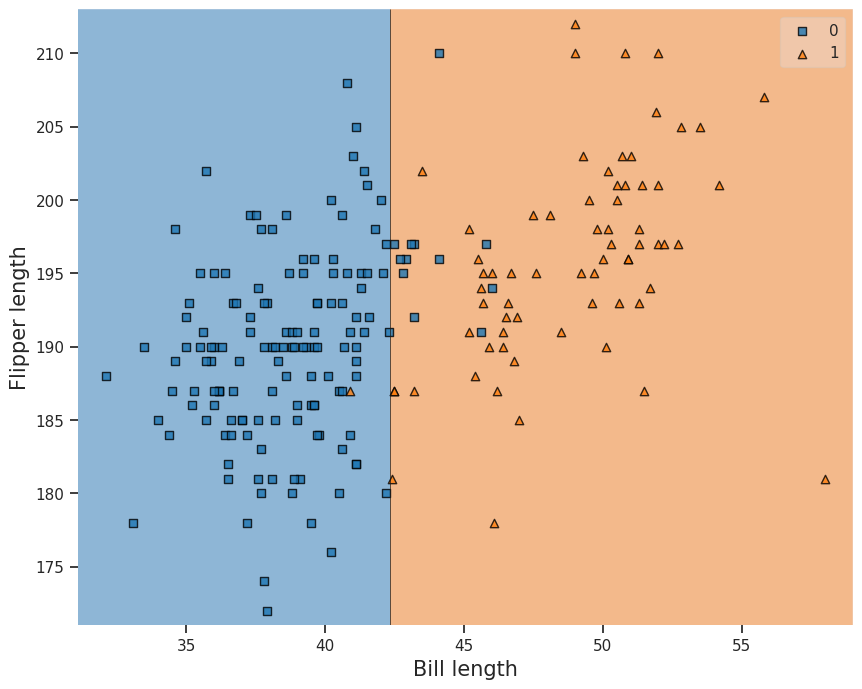

In [10]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree_depth_1)
plt.xlabel("Bill length", fontsize = 15)
plt.ylabel("Flipper length", fontsize = 15)
plt.grid()
plt.show()

Now we create the decision region for our bagging model.

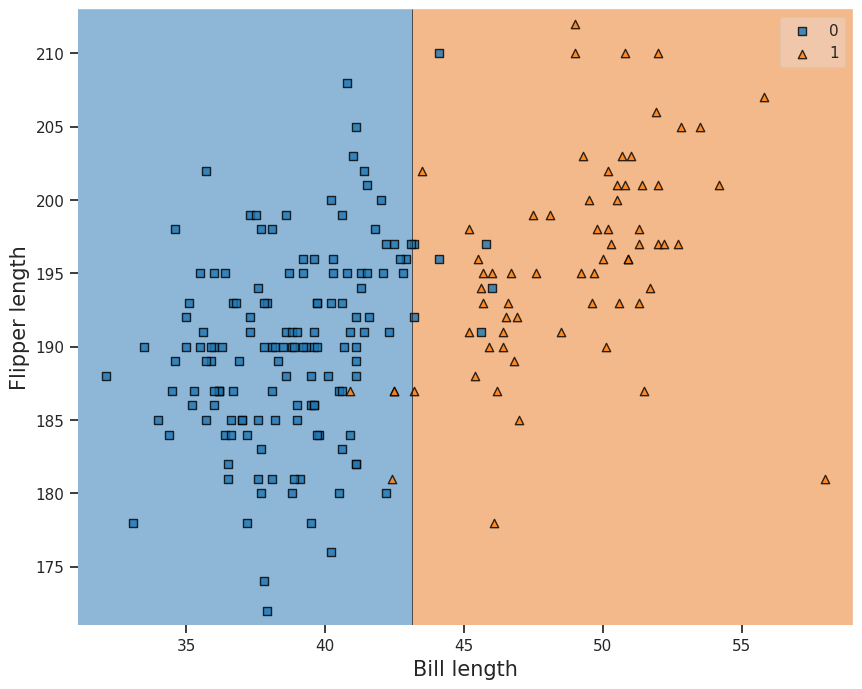

In [11]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bagging_1)
plt.xlabel("Bill length", fontsize = 15)
plt.ylabel("Flipper length", fontsize = 15)
plt.grid()
plt.show()

The separation line for bagging is slightly better with less outliers. Next, we can try improving the classification model by using all features instead of just 2 features.

In [12]:
X = df[["bill_length_mm", "flipper_length_mm", "bill_depth_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

decision_tree_all_features = DecisionTreeClassifier(max_depth=15, random_state=42)
bagging_all_features = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 500, bootstrap = True)
rnd_all_features = RandomForestClassifier(max_depth = 3, n_estimators = 500, bootstrap = True, random_state=42)

model_3 = {"Decision Tree all features": decision_tree_all_features, 
         "Bagging all features": bagging_all_features, 
         "Random forests all features": rnd_all_features}

model_accuracies_3 = []
for key in model_3:
    model_3[key].fit(X_train, y_train)
    model_pred = model_3[key].predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    model_accuracies_3.append(accuracy)

We can combine all previous models and compare them as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'Voting'),
  Text(4, 0, 'Decision Tree depth 1'),
  Text(5, 0, 'Decision Tree depth 3'),
  Text(6, 0, 'Decision Tree depth 5'),
  Text(7, 0, 'Bagging depth 1'),
  Text(8, 0, 'Decision Tree all features'),
  Text(9, 0, 'Bagging all features'),
  Text(10, 0, 'Random forests all features')])

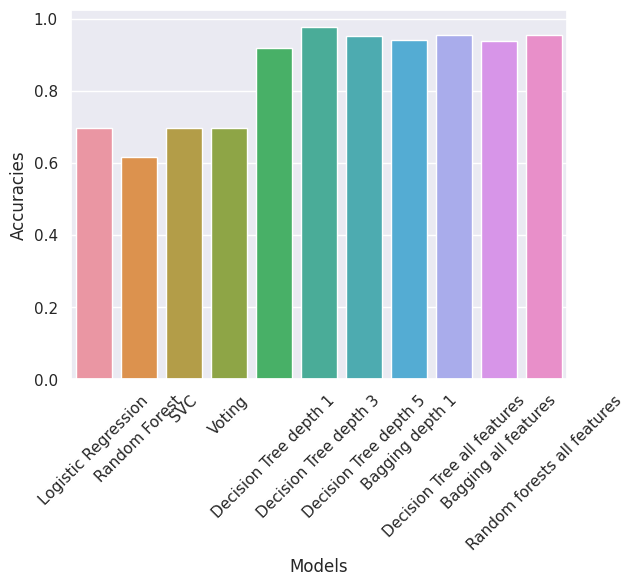

In [13]:
models = list(model_1.keys()) + list(model_2.keys()) + list(model_3.keys())
model_accuracies = model_accuracies_1 + model_accuracies_2 + model_accuracies_3
model_df = pd.DataFrame({'Models': models,
                         'Accuracies': model_accuracies})
sns.barplot(x = 'Models', y = 'Accuracies', data = model_df)
plt.xticks(rotation=45)

Combining all features does increase accuracy, especially random forest, but still equal to decision trees when using 2 features. We can also see which features is the most important for our random forest model.

In [14]:
rnd_all_features = RandomForestClassifier(max_depth = 3, n_estimators = 500, bootstrap = True, random_state=42)
rnd_all_features.fit(X_train, y_train)
features = ["bill_length_mm", "flipper_length_mm", "bill_depth_mm", "body_mass_g"]
for feature, score in zip(features, rnd_all_features.feature_importances_):
    print(feature, score)

bill_length_mm 0.7835394269830425
flipper_length_mm 0.114806180011778
bill_depth_mm 0.04765782140740525
body_mass_g 0.05399657159777438


# Conclusion
As expected, body mass is the least important feature, probably due to its different scaling and unit compared to the other 3 features. Our 2 features input model work as well as the all features input model because the bill length and flipper length, as shown above, are the most important and is the most important in determining our models' accuracies.